<a href="https://colab.research.google.com/github/fader2077/INPEPENDENT_STUDY/blob/main/MLP_BEGINNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''from google.colab import files
files.upload()'''

'from google.colab import files\nfiles.upload()'

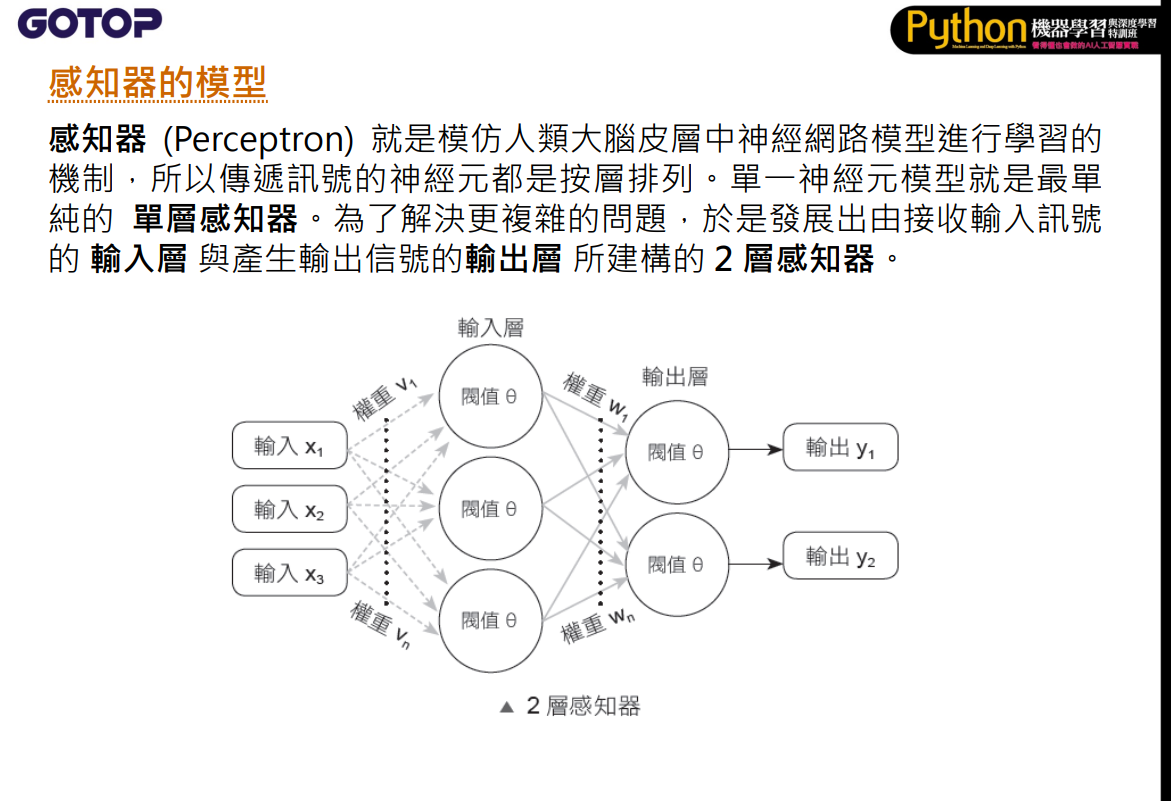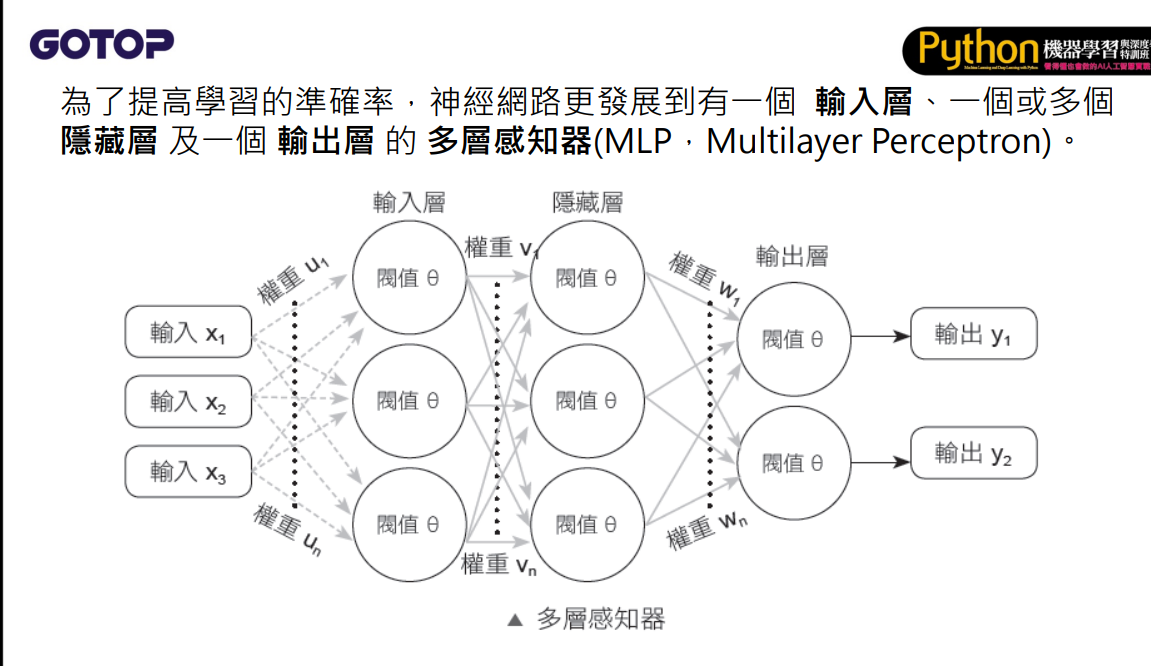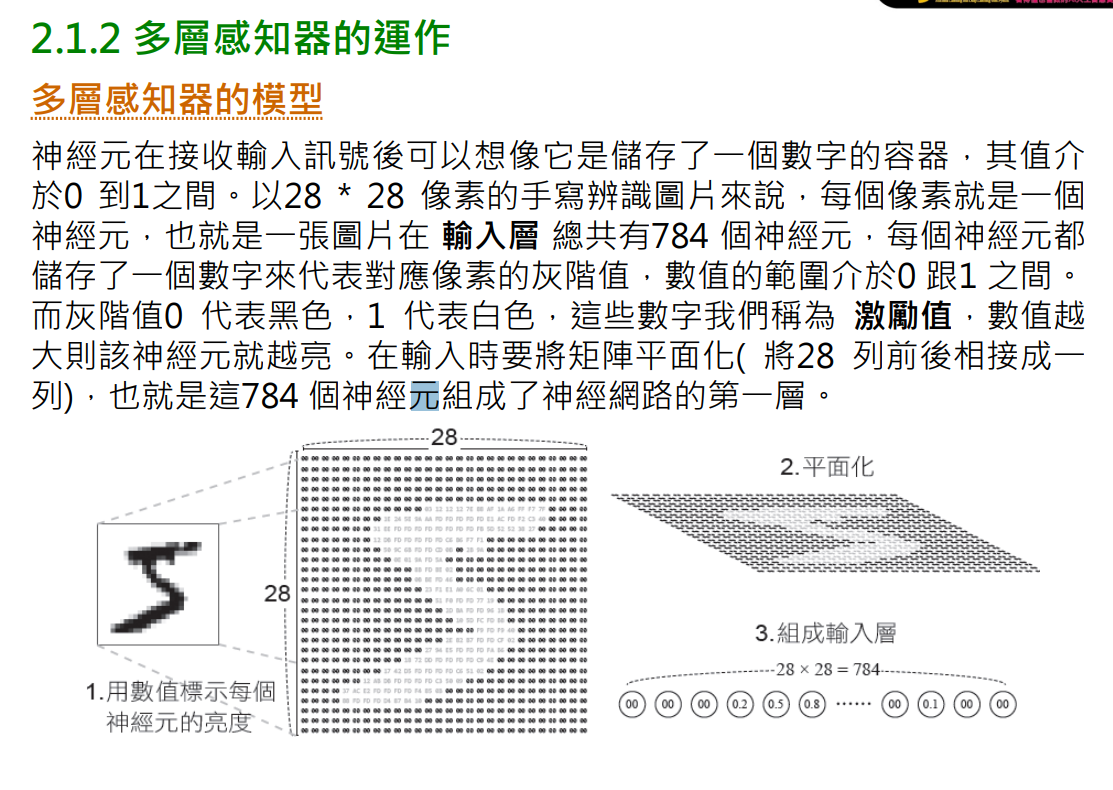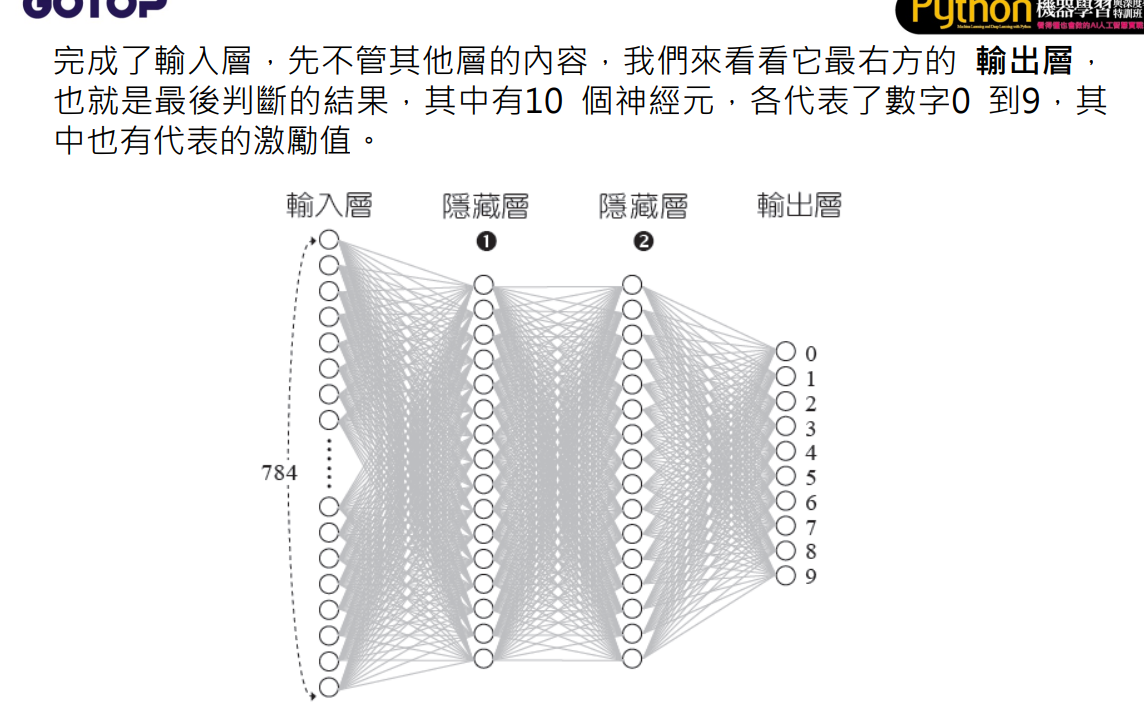

下載 Mnist 資料集

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(train_feature,train_label),(test_feature,test_label) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


讀取Mnist 資料集

In [5]:
(train_feature,train_label),(test_feature,test_label) = mnist.load_data()

Prg2 查看訓練資料

In [6]:
print(len(train_feature),len(train_label))#查看訓練資料   

60000 60000


In [7]:
print(train_feature.shape,train_label.shape)

(60000, 28, 28) (60000,)


Prg3 顯示訓練資料的圖片與值

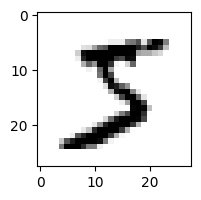

In [9]:
def show_image(image):
  fig = plt.gcf()#用于获取当前图形。如果没有可用的当前图形，那么将借助figure()函数创建一个。
  fig.set_size_inches(2,2)#數字圖片大小
  plt.imshow(image,cmap='binary')#黑白灰階顯示
  plt.show()

show_image(train_feature[0])



In [10]:
print(train_label[0])#顯示第一個訓練資料圖片真實性

5


Prg4 顯示多張圖片資料



In [11]:
def show_images_labels_prediction(images,labels,predictions,start_id,num=10):
  plt.gcf().set_size_inches(20,20)
  #if num>25:num=25 最多25張照片
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)#(列,行,索引)(nrows, ncols, index)
    #顯示黑白照片
    ax.imshow(images[start_id],cmap='binary')
    #有AI預測結果資料，才在標題顯示預測結果
    if len(predictions)>0:
      title =' ai = '+str(predictions[start_id])
      #預測正確顯示(o)，錯誤顯示(x)
      title += ('(o)' if predictions[start_id].all()==labels[start_id].all() else '(x)')
      title +='\nlabel = '+str(labels[start_id])
    #沒有AI預測結果資料，在標題顯示真實數據
    else:
      title = 'label = '+str(labels[start_id])
    #X,Y軸不顯示刻度
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    start_id+=1
  plt.show()

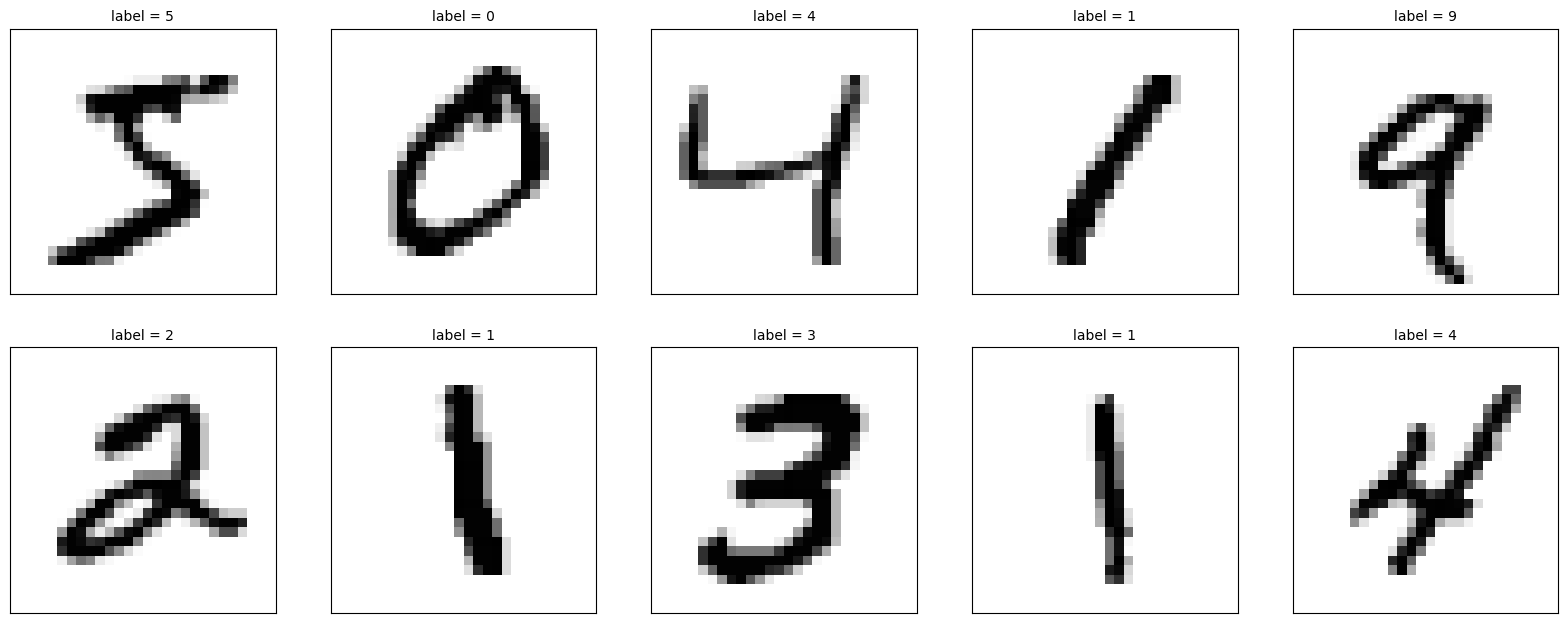

In [12]:
#顯示訓練資料
#num=int(input())
show_images_labels_prediction(train_feature,train_label,[],0,10)

In [13]:
print(len(train_feature),len(train_label))
print(train_feature.shape,train_label.shape)

60000 60000
(60000, 28, 28) (60000,)


In [14]:
import matplotlib.pyplot as plt
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2)
  plt.imshow(image,cmap='binary')
  plt.show()

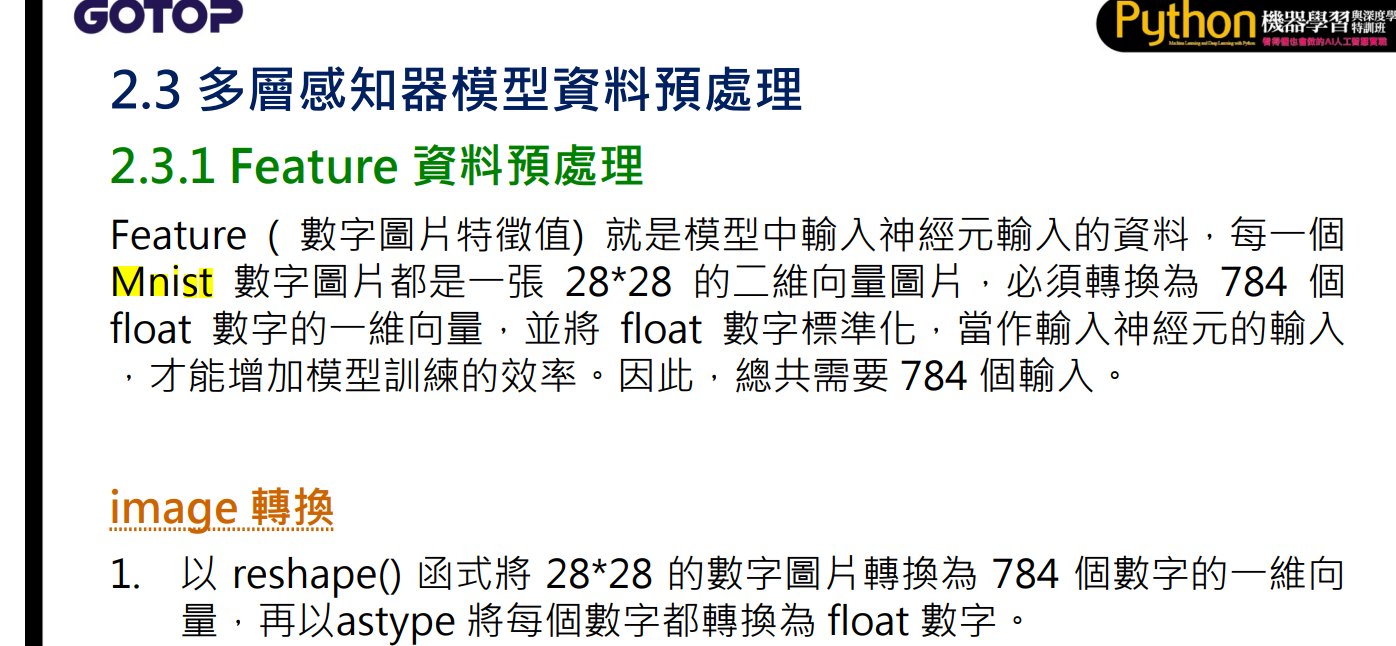

p`rg5 # 以reshape()函數將28*28的數字圖片轉換成
784個數字的一維向量，再以astype將每個數字都轉換
為float數字

In [15]:
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

print(train_feature_vector.shape,test_feature_vector.shape)

(60000, 784) (10000, 784)


In [16]:
#顯示第1筆image資料內容，顯示0-255浮點數。數字代表圖片中每個點的灰階值
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Prg6 資料標準化 (每一個點變成0~1之間數字)

In [17]:
# 0~255 的數字，除以 255 得到 0~1 之間浮點數，稱為標準化(Normalize)，標準化之後可以提高模型預測的準確度，增加訓練效率。
train_feature_normalize=train_feature_vector/255
test_feature_normalize=test_feature_vector/255
#顯示第一筆的image正規化
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

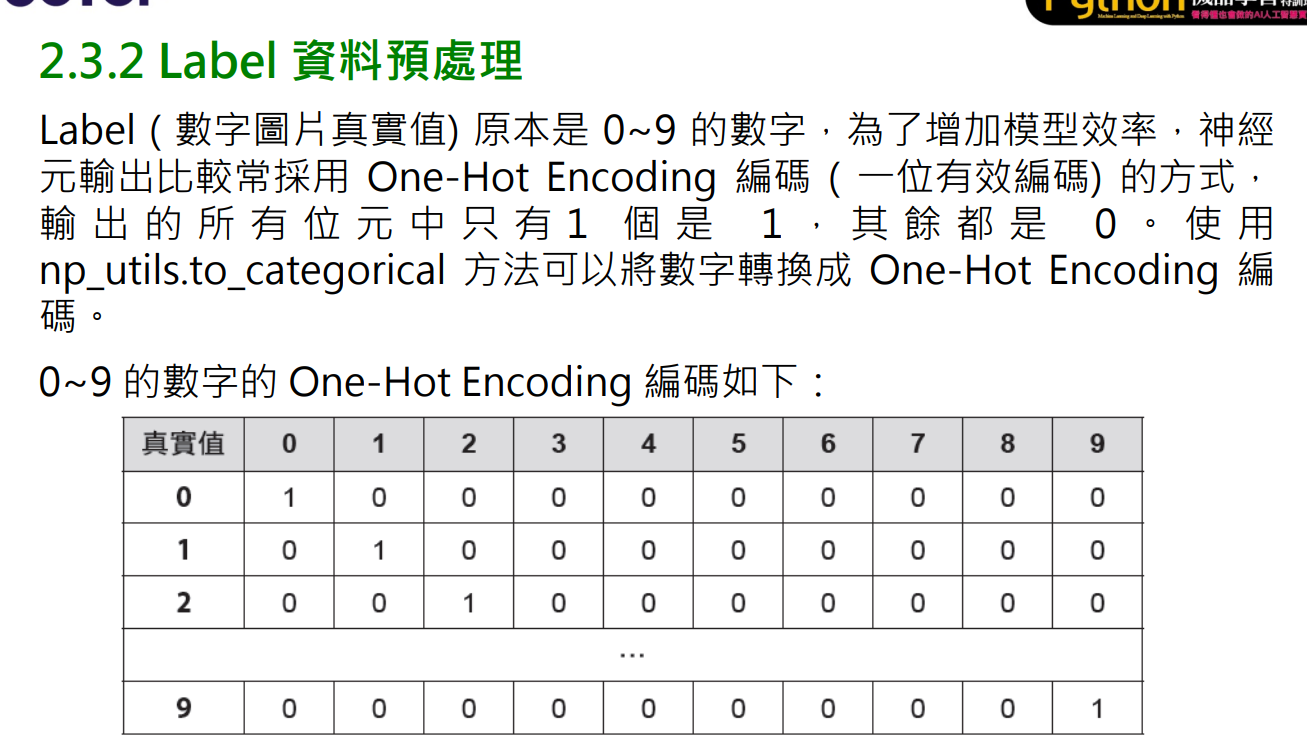

In [18]:
#One-Hot Encoding
print(train_label[0:5])#顯示訓練資料前五筆

[5 0 4 1 9]


In [19]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


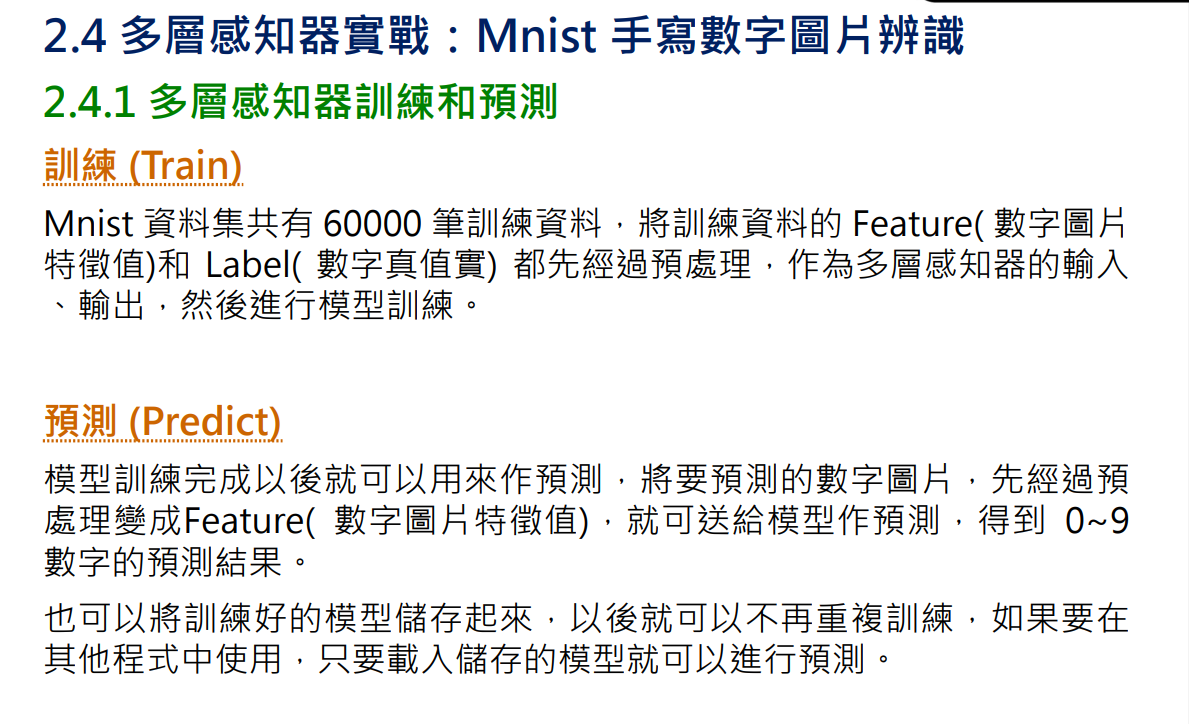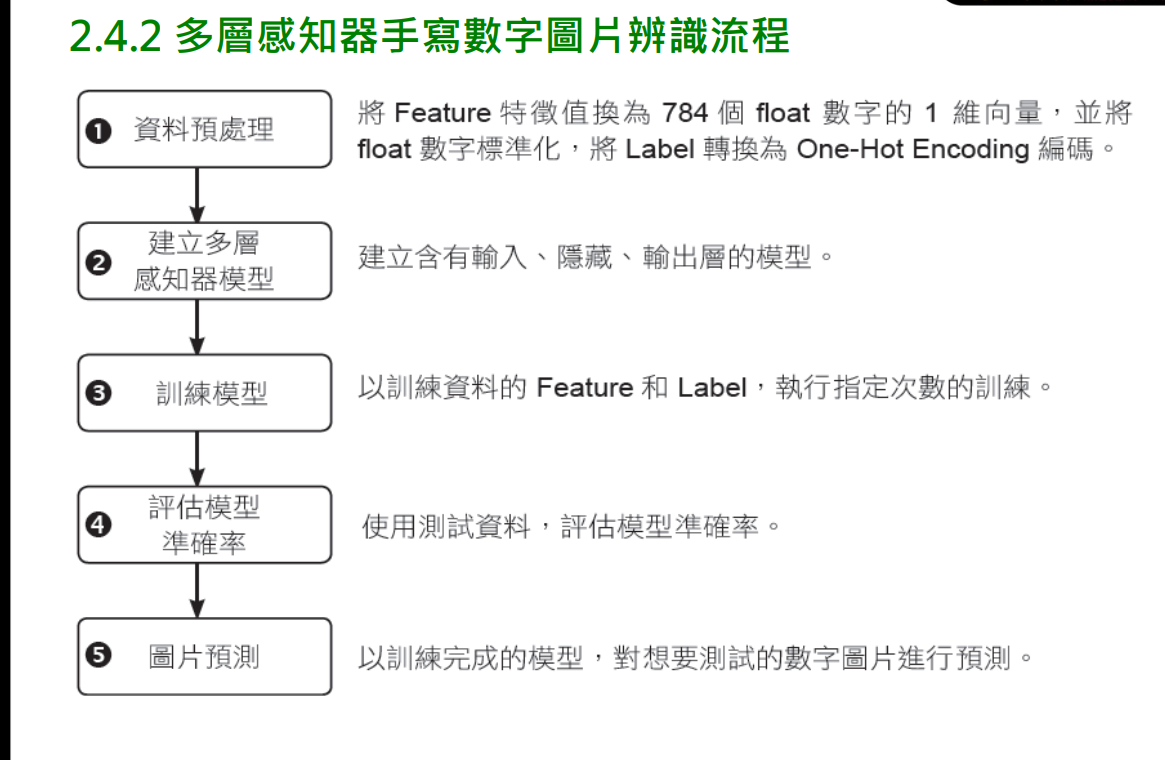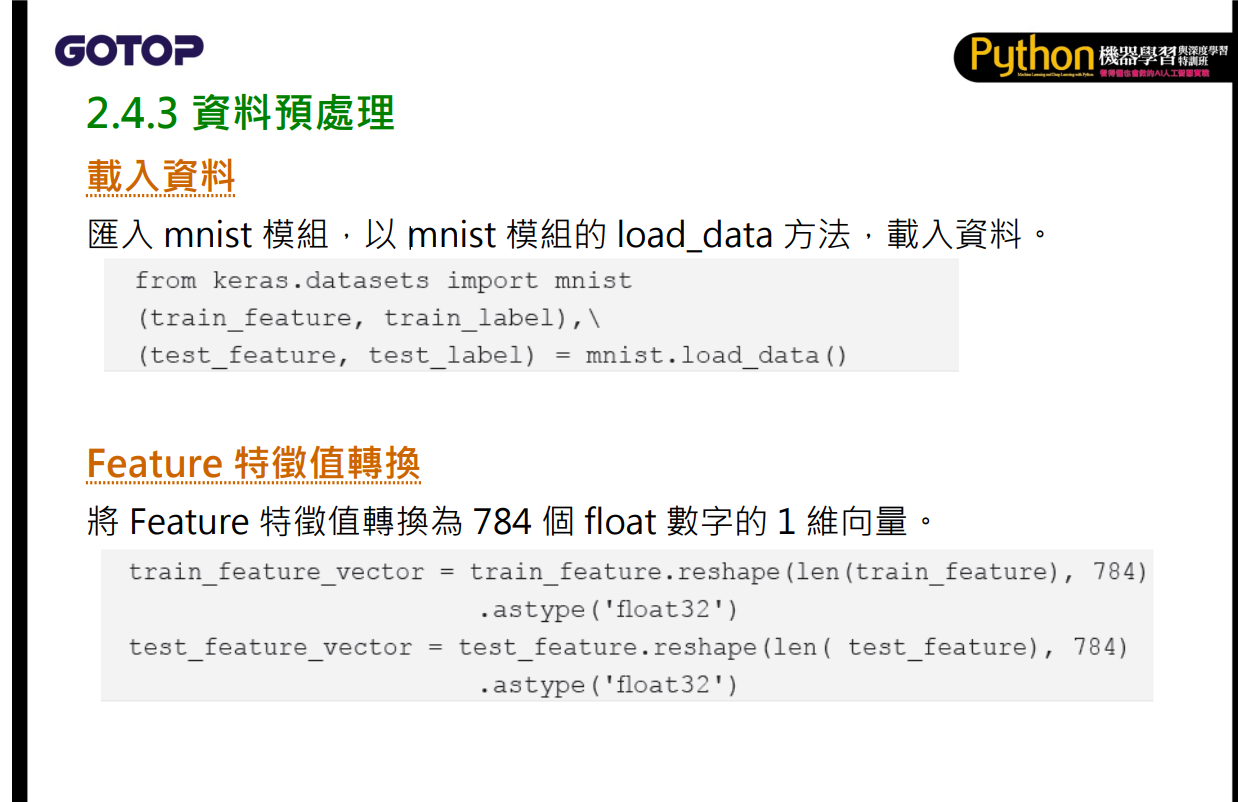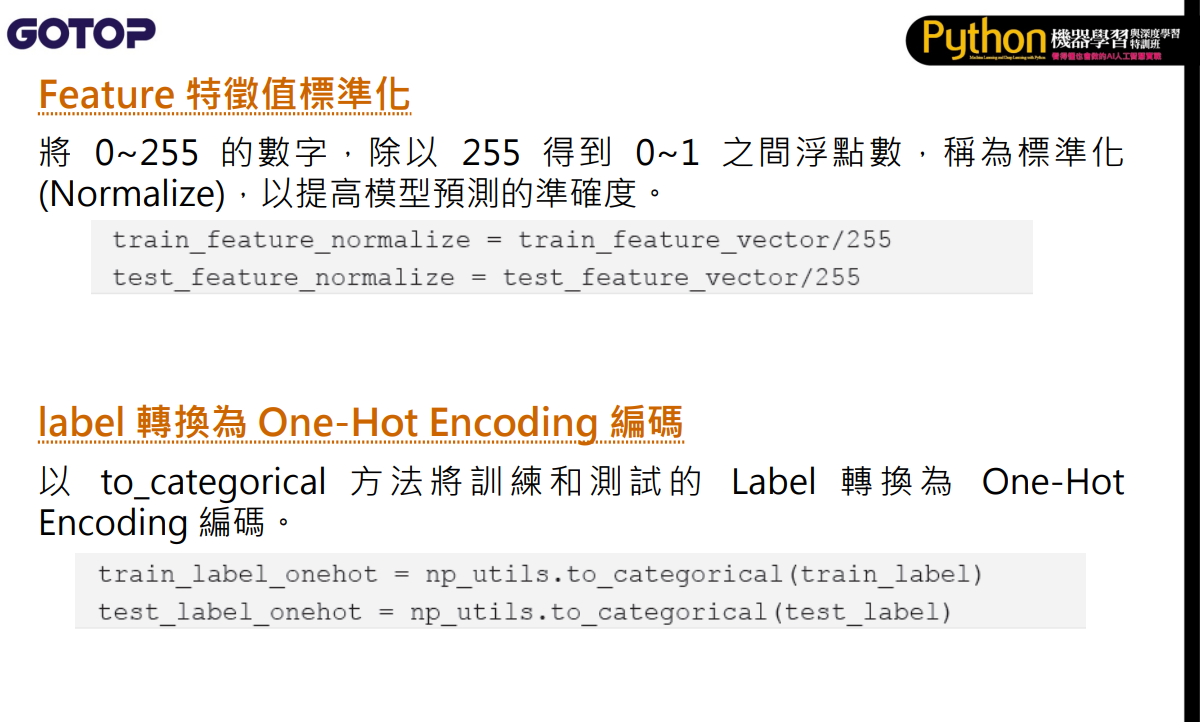

In [20]:
from keras.datasets import mnist
(train_feature,train_label),(test_feature,test_label)=mnist.load_data()
#feature特徵值轉換
train_feature_vector=train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector=test_feature.reshape(len(test_feature),784).astype('float32')
#feature特徵標準化
train_feature_normalize=train_feature_vector/255
test_feature_normalize=test_feature_vector/255
#label轉換為one hot encoding
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

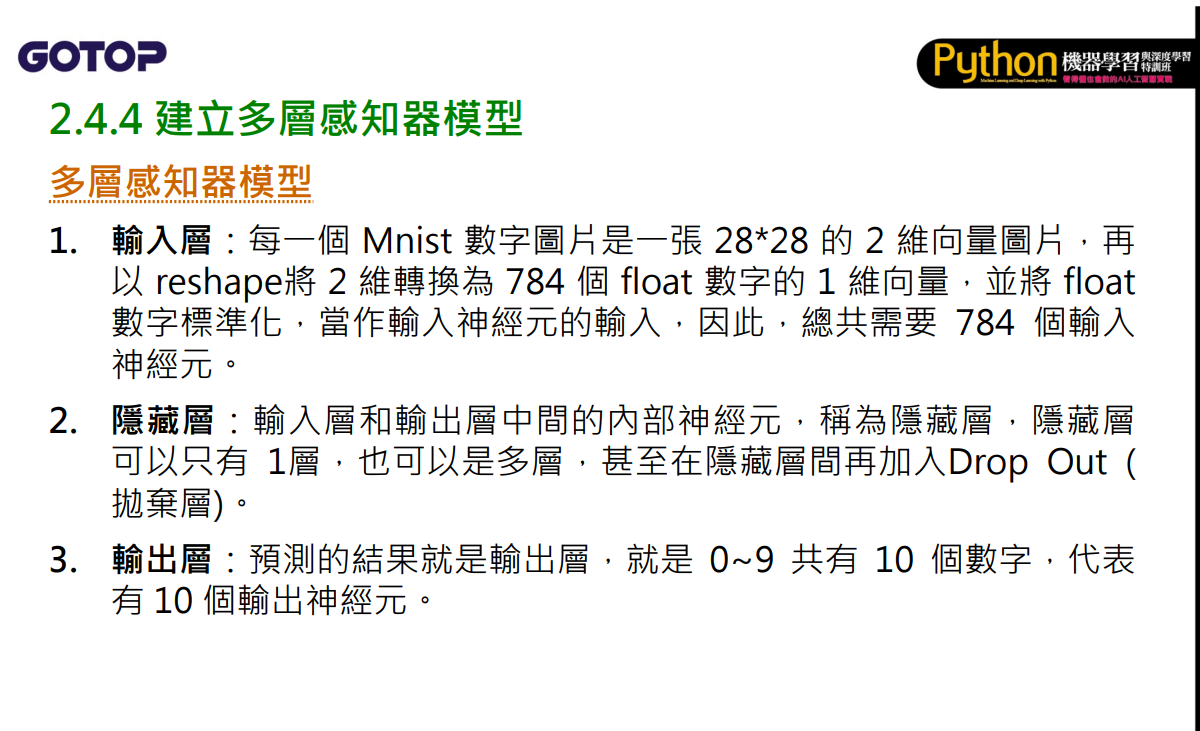

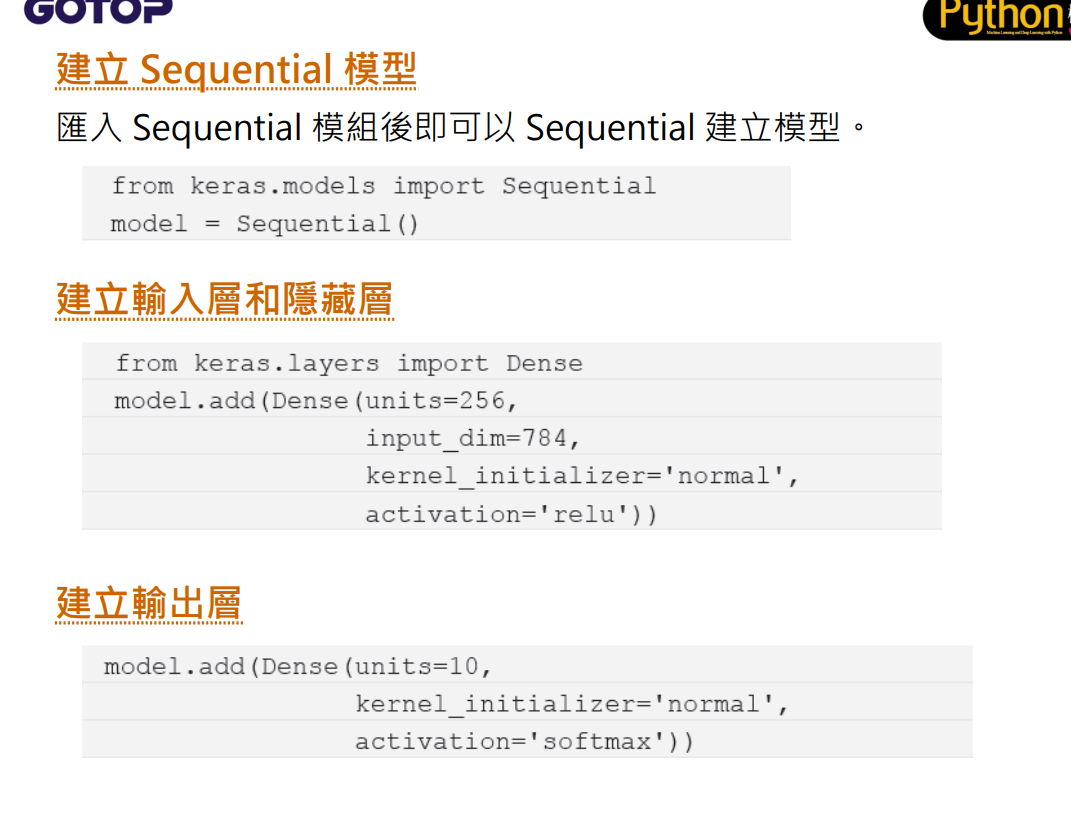

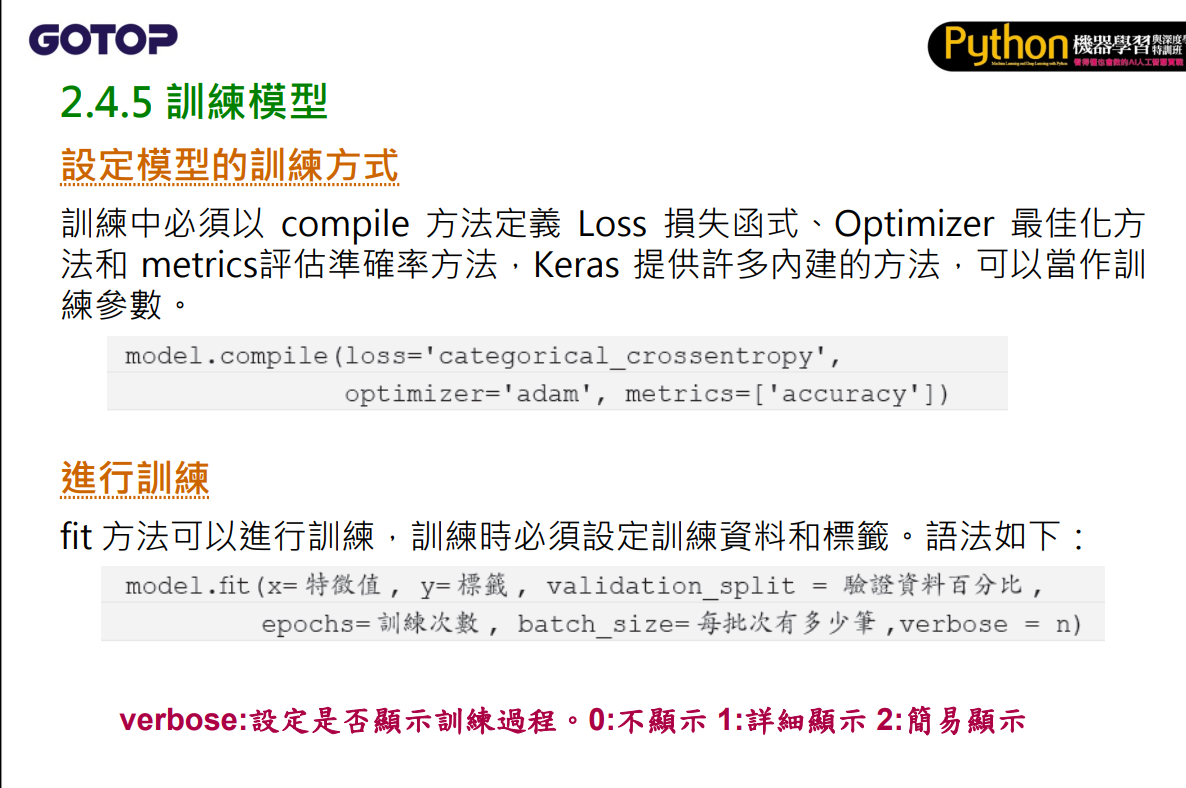

Prg8 建立模型

In [21]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [22]:
#建立模型
model = Sequential()

In [23]:
#輸入層:784 隱藏層:256 輸出層:10
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [24]:
#定義訓練方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
#訓練資料保留20%(validation_split=0.2)做驗證，訓練10次(epoch=10)，每批次讀取200筆資料(batch_size=200)，顯示簡易訓練過程
train_histroy = model.fit(x=train_feature_normalize,y=train_label_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 6s - loss: 0.4359 - accuracy: 0.8859 - val_loss: 0.2205 - val_accuracy: 0.9385 - 6s/epoch - 26ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1904 - accuracy: 0.9456 - val_loss: 0.1626 - val_accuracy: 0.9541 - 1s/epoch - 4ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1349 - accuracy: 0.9612 - val_loss: 0.1303 - val_accuracy: 0.9612 - 1s/epoch - 5ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1020 - accuracy: 0.9711 - val_loss: 0.1078 - val_accuracy: 0.9680 - 1s/epoch - 5ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0805 - accuracy: 0.9776 - val_loss: 0.1011 - val_accuracy: 0.9714 - 1s/epoch - 6ms/step
Epoch 6/10
240/240 - 2s - loss: 0.0660 - accuracy: 0.9812 - val_loss: 0.0903 - val_accuracy: 0.9741 - 2s/epoch - 6ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0541 - accuracy: 0.9850 - val_loss: 0.0900 - val_accuracy: 0.9718 - 1s/epoch - 5ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0448 - accuracy: 0.9879 - val_loss: 0.0846 - val_accuracy: 0.9744 - 707ms/epoch - 3ms/step
Epoch 9/10
240/240 -

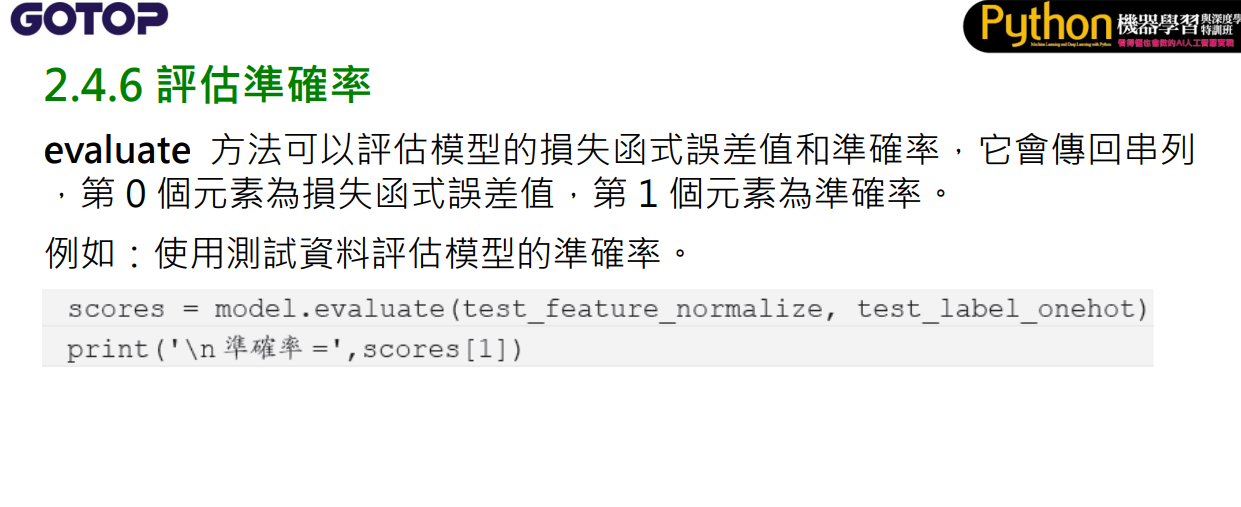

Prg8#2 評估準確度與顯示圖形

In [26]:
#評估準確率
scores=model.evaluate(test_feature_normalize,test_label_onehot)
print('\n準確率=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9785

準確率= 0.9785000085830688


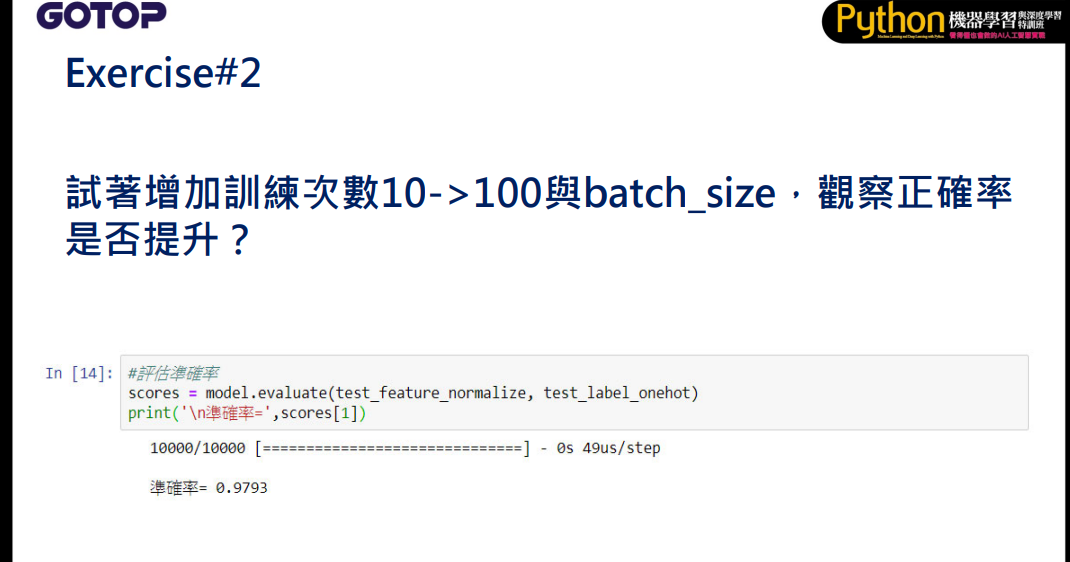

In [27]:
#YES
#評估準確率
scores=model.evaluate(test_feature_normalize,test_label_onehot)
print('\n準確率=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9785

準確率= 0.9785000085830688


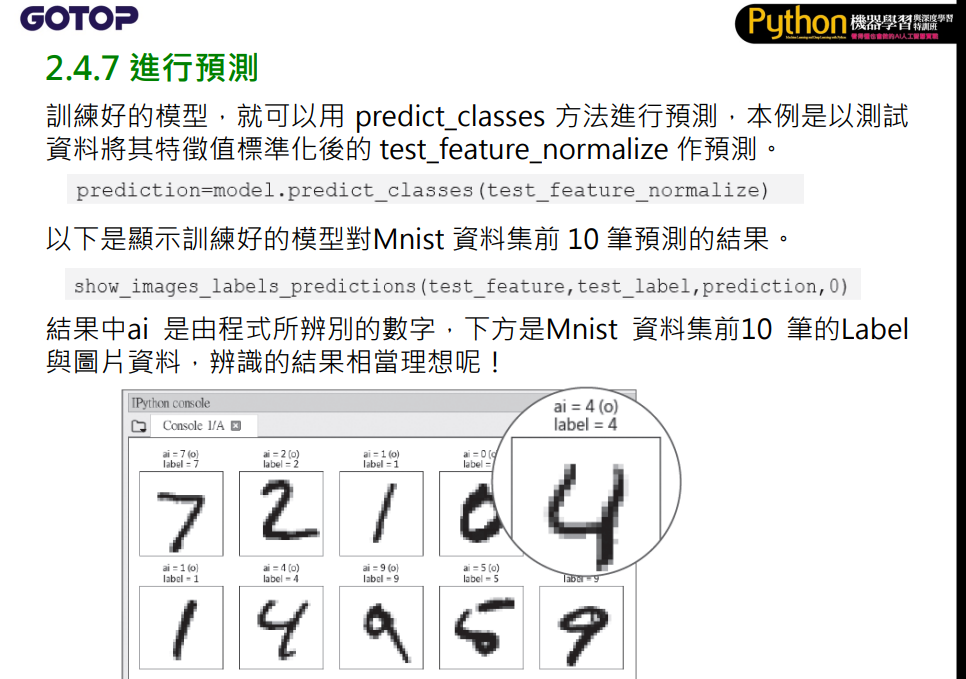

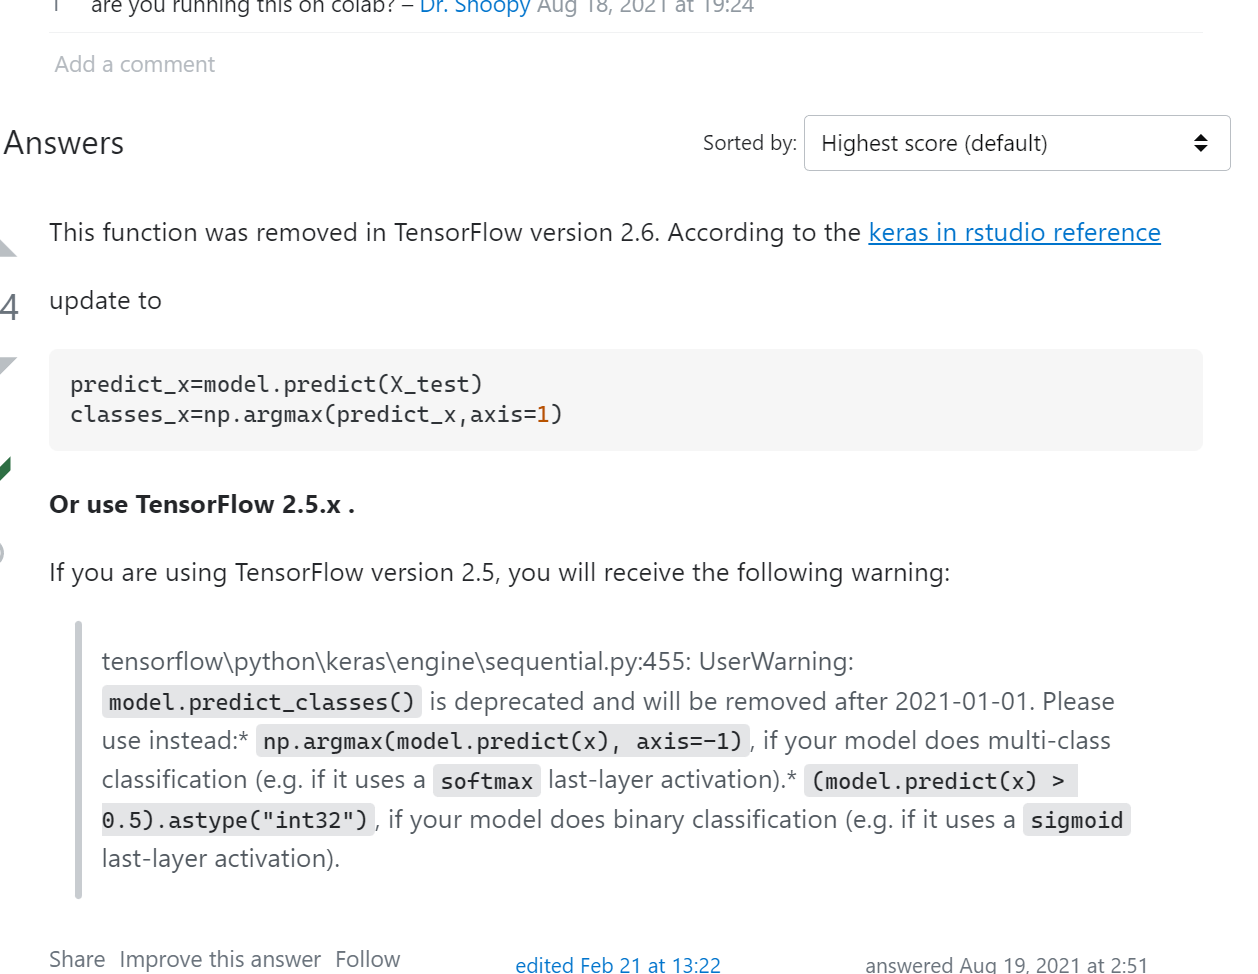

313/313 [==============================] - 1s 2ms/step


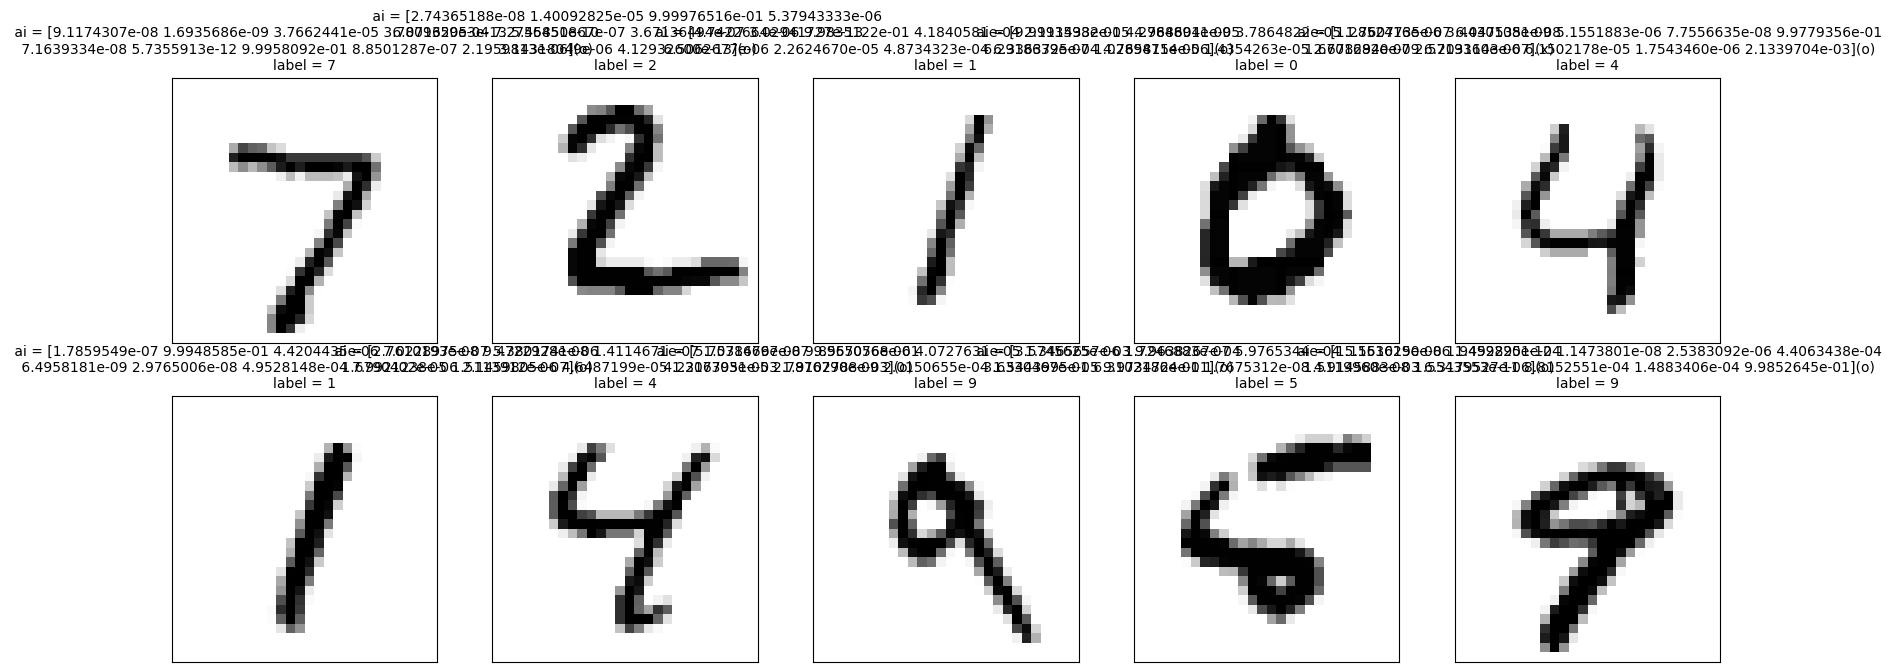

In [28]:
import numpy as np
#預測
#prediction=model.predict_classes(test_feature_normalize)

prediction=model.predict(test_feature_normalize)
#顯示圖像，預測值，真實度
show_images_labels_prediction(test_feature,test_label,prediction,0)

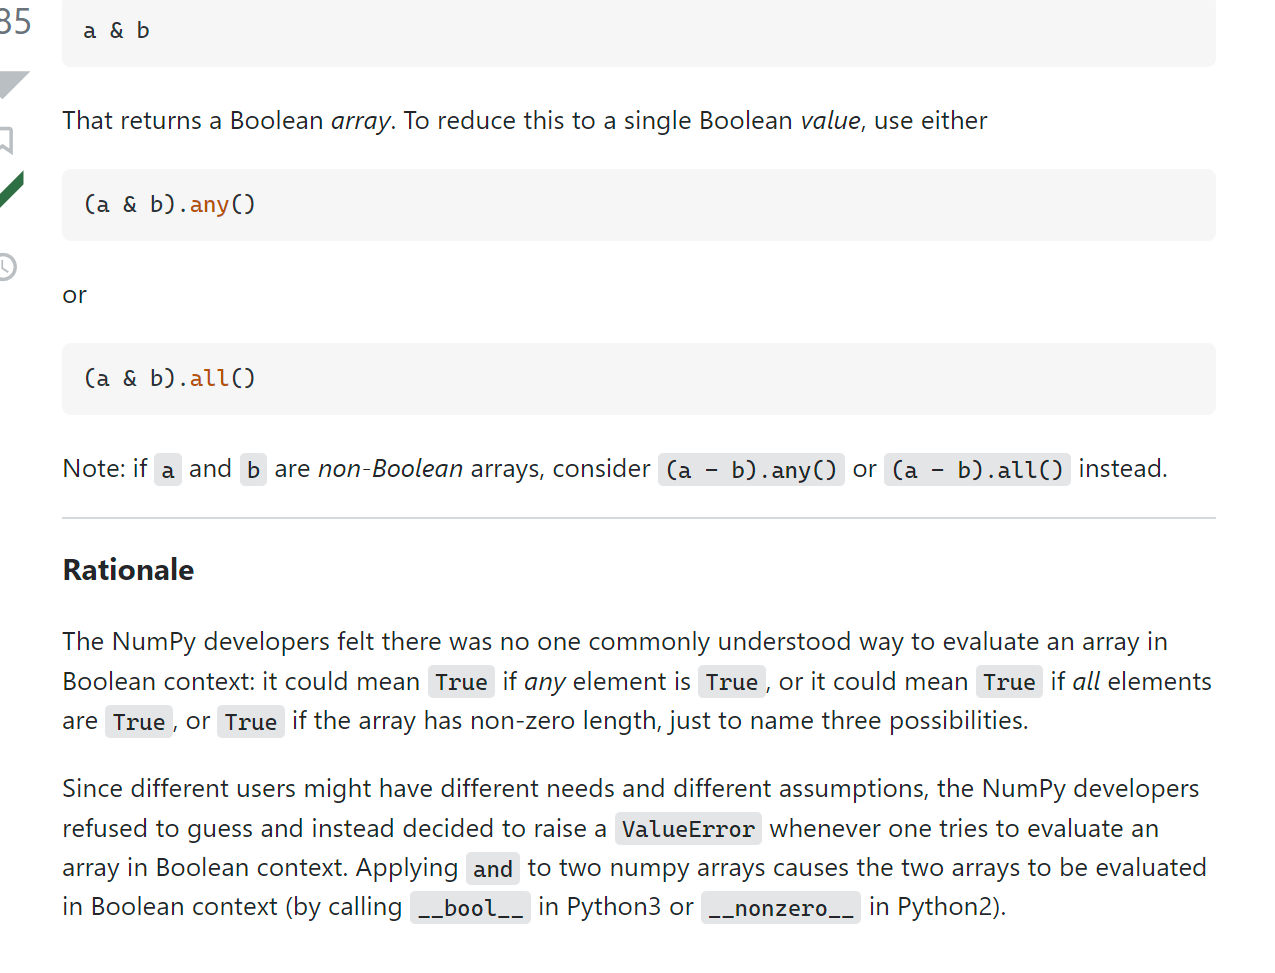

In [32]:
def show_images_labels_prediction(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
       
        ax.imshow(images[start_id])
        
        
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
           
            title += (' (o)' if (predictions[start_id]==labels[start_id]).all() else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
      
        else :
            title = 'label = ' + str(labels[start_id])
            
         
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()
#https://stackoverflow.com/questions/69655221/i-do-not-understand-what-it-meant-by-empty-dataset-in-machine-learning-python

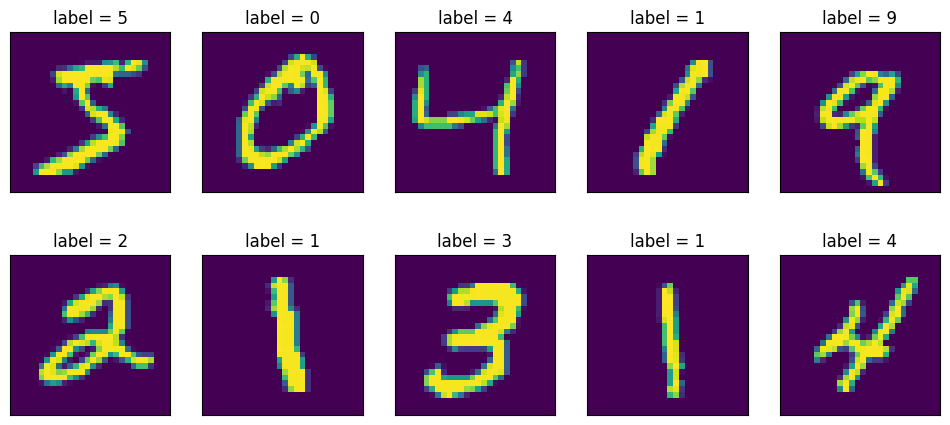

In [33]:
#顯示訓練資料
#num=int(input())
show_images_labels_prediction(train_feature,train_label,[],0,10)

313/313 [==============================] - 0s 2ms/step


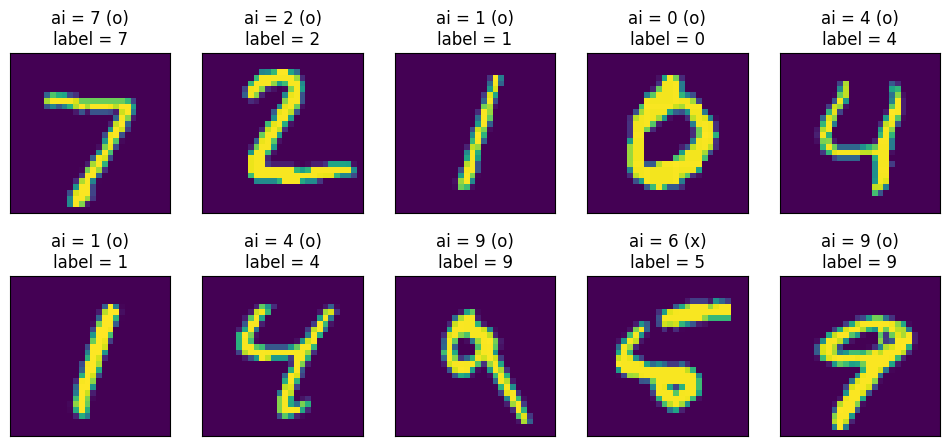

In [35]:
#預測
prediction=model.predict(test_feature_normalize)
prediction = np.argmax(prediction,axis=1)
#顯示圖像，預測值，真實度
show_images_labels_prediction(test_feature,test_label,prediction,0)

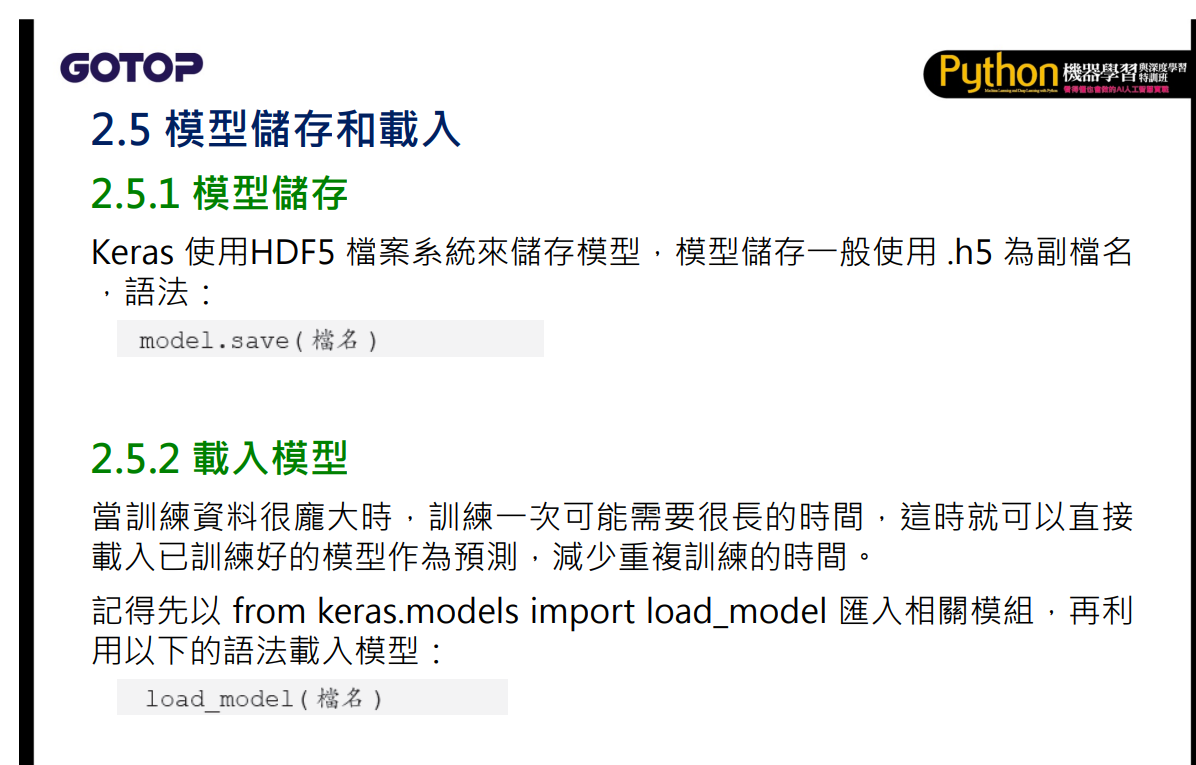

Prg9 儲存與載入模型
程式目錄中會多了一個Mnist_mlp_model.h5檔案

In [37]:
model.save('Minst_mlp_model.h5')
print('Minst_mlp_model.h5 SAVE!')
del model

#載入模型
#Load_model('Minst_ml-Model.h5')

Minst_mlp_model.h5 SAVE!


Prg10 模型載入與預測


載入Minst_mlp_model模型
313/313 [==============================] - 1s 2ms/step


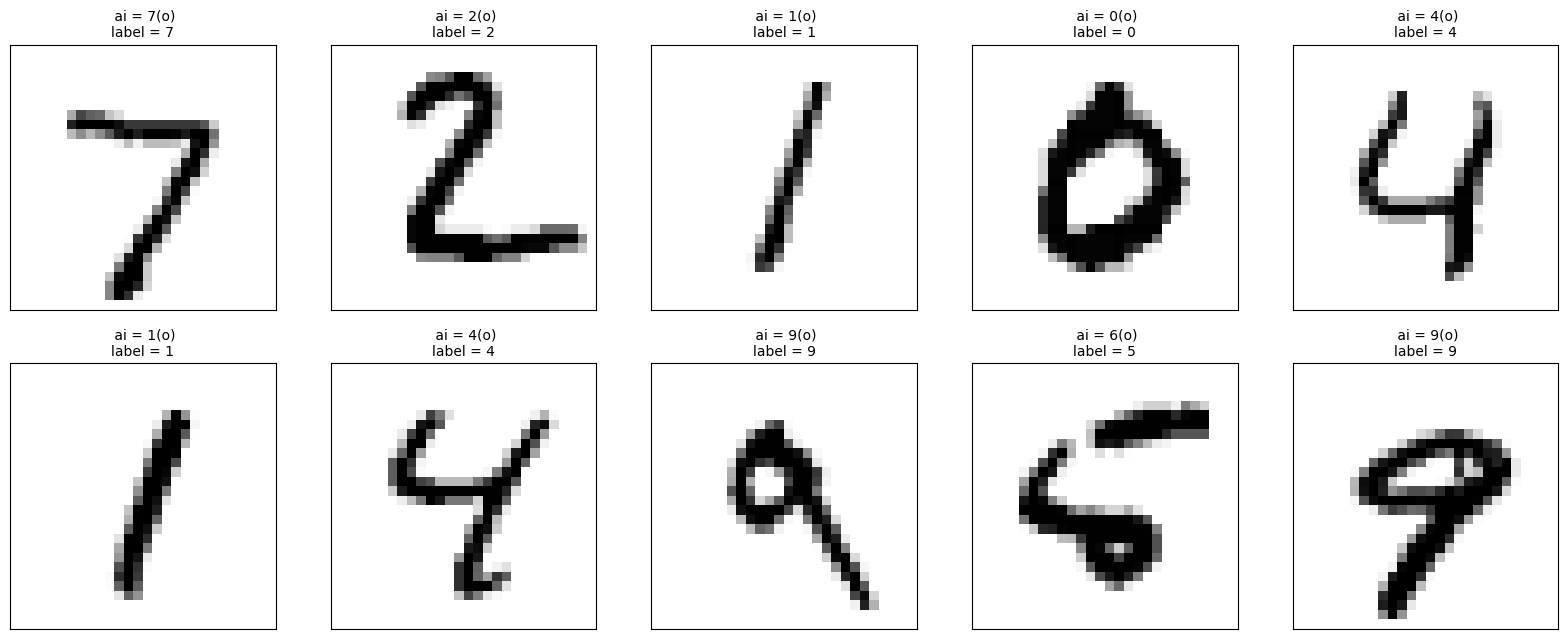

In [39]:
import numpy as np
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model
def show_images_labels_prediction(images,labels,predictions,start_id,num=10):
  plt.gcf().set_size_inches(20,20)
  #if num>25:num=25 最多25張照片
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)#(列,行,索引)(nrows, ncols, index)
    #顯示黑白照片
    ax.imshow(images[start_id],cmap='binary')
    #有AI預測結果資料，才在標題顯示預測結果
    if len(predictions)>0:
      title =' ai = '+str(predictions[i])
      #預測正確顯示(o)，錯誤顯示(x)
      title += ('(o)' if predictions[i].any()==labels[i].any() else '(x)')
      title +='\nlabel = '+str(labels[i])
    #沒有AI預測結果資料，在標題顯示真實數據
    else:
      title = 'label = '+str(labels[i])
    #X,Y軸不顯示刻度
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    start_id+=1
  plt.show()
#建立訓練資料和測試資料，包含訓練集特徵，訓練標籤和測試特徵集，測試標籤
(train_feature,train_label),\
(test_feature,test_label) = mnist.load_data()
#feature特徵值轉為784個float數字的一維向量
test_feature_vector=test_feature.reshape(len(test_feature),784).astype('float32')
#feature特徵值標準化
test_feature_normalize=test_feature_vector/255
#載入模型
print('載入Minst_mlp_model模型')
model = load_model('Minst_mlp_model.h5')

#預測
prediction=model.predict(test_feature_normalize)
prediction = np.argmax(prediction,axis=1)

#顯示圖像，預測值，真實度
show_images_labels_prediction(test_feature,test_label,prediction,0)

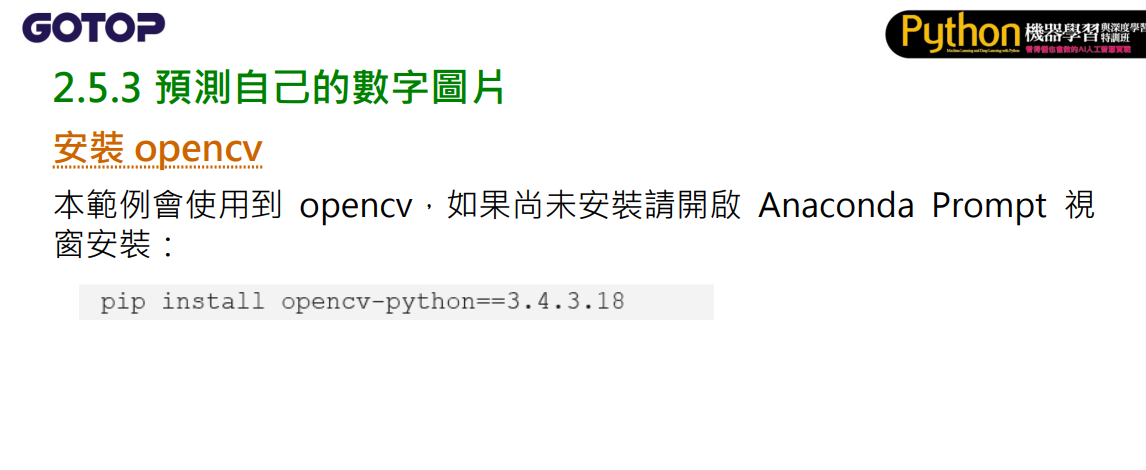

In [36]:
#安裝opencv
#pip install opencv-python==3.4.3.18
#https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/1-Fundamentals.ipynb#scrollTo=TXKxw8iJebez
# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (28.0, 28.0) # this controls figure size in the notebook

Prg11 預測自己的圖片
#1

In [41]:
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
from keras.models import load_model
import glob,cv2

In [42]:
def show_images_labels_prediction(images,labels,predictions,start_id,num=10):
  plt.gcf().set_size_inches(20,20)
  #if num>25:num=25 最多25張照片
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)#(列,行,索引)(nrows, ncols, index)
    #顯示黑白照片
    ax.imshow(images[start_id],cmap='binary')
    #有AI預測結果資料，才在標題顯示預測結果
    if len(predictions)>0:
      title =' ai = '+str(predictions[start_id])
      #預測正確顯示(o)，錯誤顯示(x)
      title += ('(o)' if predictions[i].any()==labels[i].any() else '(x)')
      title +='\nlabel = '+str(labels[i])
    #沒有AI預測結果資料，在標題顯示真實數據
    else:
      title = 'label = '+str(labels[i])
    #X,Y軸不顯示刻度
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    start_id+=1
  plt.show()

Prg11 預測自己的圖片2



In [ ]:
files = glob.glob('imagedata\33.jpg')
test_feature=[]
test_label=[]
for file in files:
  img=cv2.imread(file)
  img=cv2